In [1]:
# CIFAR-10 CNN Example

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# 텐서로 변환
x_train = x_train.reshape(-1, 32, 32, 3) # -1의 의미: 변경된 배열의 -1 위치의 차원은 원래 배열의 길이와 남은 차원으로부터 추정된다는 의미
x_test = x_test.reshape(-1, 32, 32, 3)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

170500096/170498071 [==============================] - 38s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


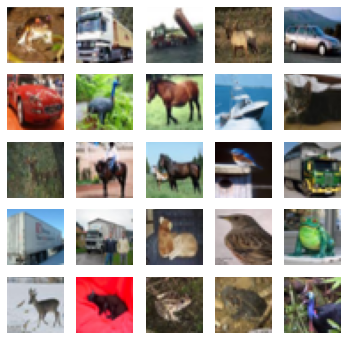

In [9]:
import matplotlib.pyplot as plt

print(x_train[0])
print('\n', x_train[0].shape)
print('\n', y_train[0])

plt.figure(figsize = (6, 6))

for index in range(25):
    plt.subplot(5, 5, index+1)
    plt.imshow(x_train[index])
    plt.axis('off')
    
plt.show()

In [3]:
#cnn 모델 구축
cnn = Sequential()

cnn.add(Conv2D(input_shape = (32, 32, 3), kernel_size = (3, 3), filters = 32, activation = 'relu'))
cnn.add(Conv2D(kernel_size = (3, 3), filters = 64, activation = 'relu'))
cnn.add(MaxPool2D(pool_size = (2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten()) # 3차원 텐서를 1차원 벡터로 전환

cnn.add(Dense(128, activation = 'relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation = 'softmax'))

In [4]:
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size = 128, epochs = 30, validation_data = (x_test, y_test))

Epoch 1/30
391/391 [==============================] - 37s 94ms/step - loss: 1.8058 - accuracy: 0.3410 - val_loss: 1.2532 - val_accuracy: 0.5533
Epoch 2/30
391/391 [==============================] - 37s 94ms/step - loss: 1.2973 - accuracy: 0.5375 - val_loss: 1.0750 - val_accuracy: 0.6312
Epoch 3/30
391/391 [==============================] - 37s 95ms/step - loss: 1.1496 - accuracy: 0.5926 - val_loss: 1.0047 - val_accuracy: 0.6554
Epoch 4/30
391/391 [==============================] - 36s 93ms/step - loss: 1.0446 - accuracy: 0.6315 - val_loss: 0.9337 - val_accuracy: 0.6746
Epoch 5/30
391/391 [==============================] - 36s 93ms/step - loss: 0.9746 - accuracy: 0.6575 - val_loss: 0.9424 - val_accuracy: 0.6714
Epoch 6/30
391/391 [==============================] - 36s 92ms/step - loss: 0.9267 - accuracy: 0.6743 - val_loss: 0.9082 - val_accuracy: 0.6858
Epoch 7/30
391/391 [==============================] - 36s 93ms/step - loss: 0.8692 - accuracy: 0.6950 - val_loss: 0.8925 - val_accuracy:

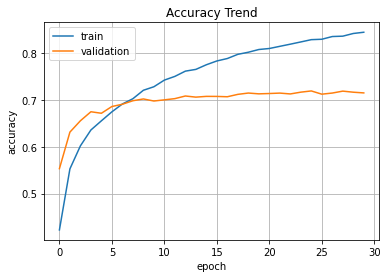

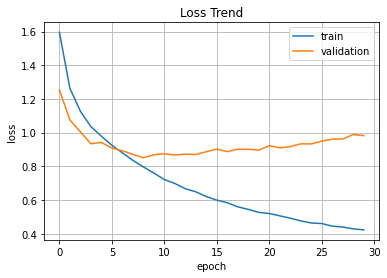

In [6]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'best')
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'best')
plt.grid()
plt.show()